## Dataset Creation

In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
def getDataframe(filename):
    readFile = open(filename, 'r')
    reader = csv.reader(readFile)

    data = list()  
    for row in reader:
        data.append(row)
    readFile.close()

    df = pd.DataFrame.from_dict(data)
    df.columns = df.iloc[0]
    df = df[1:]
    df['RTT'] = pd.to_numeric(df['RTT'], downcast="float")
    df['MessageSize'] = pd.to_numeric(df['MessageSize'], downcast="integer")
    df['NumberOfMessages'] = pd.to_numeric(df['NumberOfMessages'], downcast="integer")
    df[df.columns[4]] = pd.to_numeric(df[df.columns[4]], downcast="integer")
    
    return df

In [4]:
def getBenchmark(benchmark):
    resultsFolder = "../bin/results/Benchmark"+str(benchmark)+"/"
    resultsFiles = os.listdir(resultsFolder)

    df = getDataframe(resultsFolder+resultsFiles[0])
    for i in range(len(resultsFiles)-1):
        df = pd.concat([df, getDataframe(resultsFolder+resultsFiles[i+1])])
    return df
    

## Dataset Statistics

In [53]:
print("Valores Máximos:",df.max()["RTT"])
print("Valores Mínimos:", df.min()["RTT"])
print("Valores Médios:", df.mean()["RTT"])
print("Valores Desvio:", df.std()["RTT"])

Valores Máximos: 25.0
Valores Mínimos: 0.0
Valores Médios: 0.41225
Valores Desvio: 0.985408


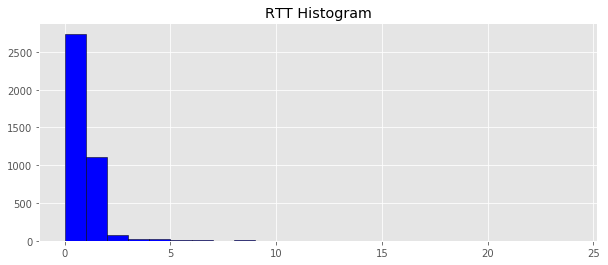

In [54]:
plt.figure(figsize=(10,4))
plt.hist(df['RTT'], bins=range(int(df.min()["RTT"]),int(df.max()["RTT"]),1), 
         histtype='bar', ec='black', color='blue')
plt.title("RTT Histogram")
plt.show()

## Benchmark 1

In [99]:
df = getBenchmark(1)
dfMean = df.groupby(['NumberOfHosts', 'MessageSize', 'NumberOfMessages']).mean()
dfStd  = df.groupby(['NumberOfHosts', 'MessageSize', 'NumberOfMessages']).std()
dfAxis = dfMean.index.levels[0]
df1Mean

,,,RTT
NumberOfHosts,MessageSize,NumberOfMessages,
2,1,1000,0.2320
3,1,1000,0.2340
5,1,1000,0.3635
6,1,1000,0.2275


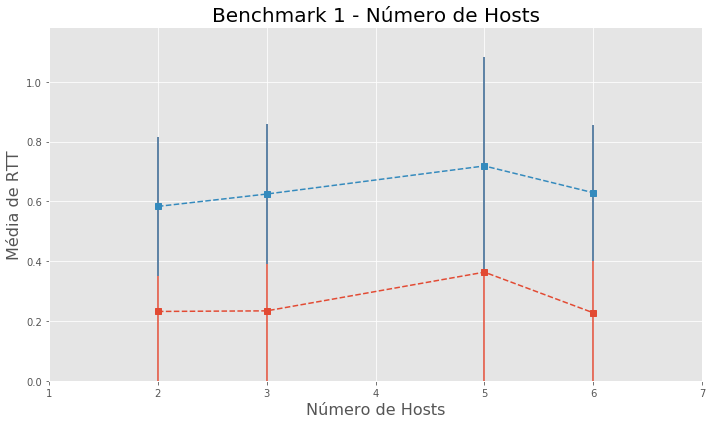

In [100]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Benchmark 1 - Número de Hosts', fontsize=20)
ax.legend(loc='upper left')
ax.set_ylabel('Média de RTT', fontsize=16)
ax.set_xlabel('Número de Hosts', fontsize=16)
ax.set_xlim([dfAxis.min()-1, dfAxis.max()+1])
ax.set_ylim([0,dfMean.max()['RTT']+dfStd.max()['RTT']+0.1])


plt.errorbar(dfAxis, dfMean['RTT'], yerr=dfStd['RTT'], fmt='--s')
plt.errorbar(dfAxis, dfStd['RTT'], yerr=dfMean['RTT'], fmt='--s')

fig.tight_layout()

## Benchmark 2

In [89]:
df = getBenchmark(2)
dfMean = df.groupby(['NumberOfSender','MessageSize','NumberOfMessages']).mean()
dfStd = df.groupby(['NumberOfSender','MessageSize','NumberOfMessages']).std()
dfAxis = dfMean.index.levels[0]
dfMean

,,,RTT
NumberOfSender,MessageSize,NumberOfMessages,
2,1,1000,0.330
4,1,1000,0.333
6,1,1000,0.387


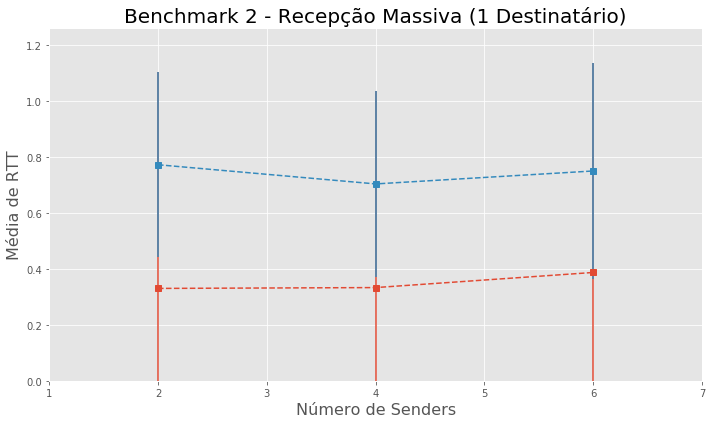

In [96]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Benchmark 2 - Recepção Massiva (1 Destinatário)', fontsize=20)
ax.legend(loc='upper left')
ax.set_ylabel('Média de RTT', fontsize=16)
ax.set_xlabel('Número de Senders', fontsize=16)
ax.set_xlim([dfAxis.min()-1, dfAxis.max()+1])
ax.set_ylim([0,dfMean.max()['RTT']+dfStd.max()['RTT']+0.1])


plt.errorbar(dfAxis, dfMean['RTT'], yerr=dfStd['RTT'], fmt='--s')
plt.errorbar(dfAxis, dfStd['RTT'], yerr=dfMean['RTT'], fmt='--s')

fig.tight_layout()

## Benchmark 3

In [ ]:
df = getBenchmark(3)
dfMean = df.groupby(['NumberOfPairs','MessageSize','NumberOfMessages']).mean()
dfStd = df.groupby(['NumberOfPairs','MessageSize','NumberOfMessages']).std()
dfAxis = dfMean.index.levels[0]
dfMean

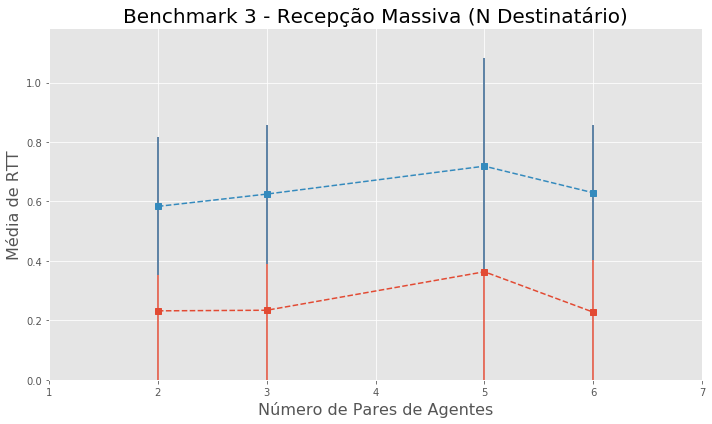

In [101]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Benchmark 3 - Recepção Massiva (N Destinatário)', fontsize=20)
ax.legend(loc='upper left')
ax.set_ylabel('Média de RTT', fontsize=16)
ax.set_xlabel('Número de Pares de Agentes', fontsize=16)
ax.set_xlim([dfAxis.min()-1, dfAxis.max()+1])
ax.set_ylim([0,dfMean.max()['RTT']+dfStd.max()['RTT']+0.1])


plt.errorbar(dfAxis, dfMean['RTT'], yerr=dfStd['RTT'], fmt='--s')
plt.errorbar(dfAxis, dfStd['RTT'], yerr=dfMean['RTT'], fmt='--s')

fig.tight_layout()

## Benchmark 4

In [ ]:
df = getBenchmark(2)
dfMean = df.groupby(['NumberOfSender','MessageSize','NumberOfMessages']).mean()
dfStd = df.groupby(['NumberOfSender','MessageSize','NumberOfMessages']).std()
dfAxis = dfMean.index.levels[0]
dfMean

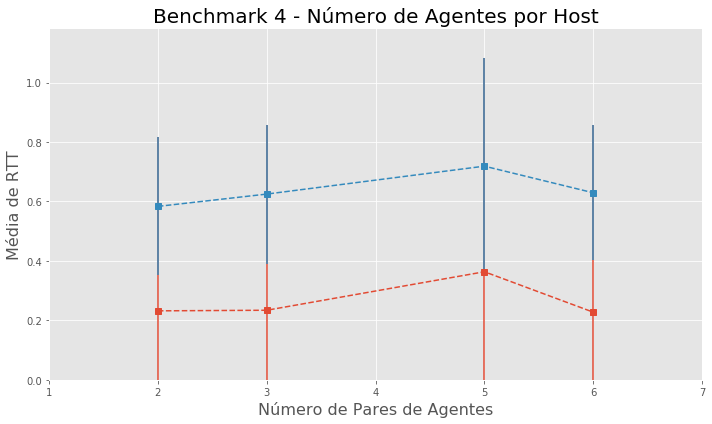

In [102]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Benchmark 4 - Número de Agentes por Host', fontsize=20)
ax.legend(loc='upper left')
ax.set_ylabel('Média de RTT', fontsize=16)
ax.set_xlabel('Número de Pares de Agentes', fontsize=16)
ax.set_xlim([dfAxis.min()-1, dfAxis.max()+1])
ax.set_ylim([0,dfMean.max()['RTT']+dfStd.max()['RTT']+0.1])


plt.errorbar(dfAxis, dfMean['RTT'], yerr=dfStd['RTT'], fmt='--s')
plt.errorbar(dfAxis, dfStd['RTT'], yerr=dfMean['RTT'], fmt='--s')

fig.tight_layout()